# [LAB-06] 10. 데이터 분포, 집계 예제 (Wage Dataset)

## #01. 준비작업

### 1. 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
#from pandas import pivot_table
#import numpy as np

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('wage')
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


## #02. 데이터 확인

### 1. 데이터 타입 확인

- for 기술통계 분석:
  - 문자열 타입 -> 카테고리 타입으로 변환
  - ->명목형 변수들은 다 기술통계에서 빠진다

In [4]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


### 2. 결측치 유무 확인

In [5]:
origin.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

## #03. 데이터 전 처리

### 1. 명목형 타입 변환

object -> category

In [6]:
df1 = origin.astype(
    {
        'year': 'category',
        'maritl': 'category',
        'race': 'category',
        'education': 'category',
        'region': 'category',
        'jobclass': 'category',
        'health': 'category',
        'health_ins': 'category'
    }
)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


## #04. 수치형 변수에 대한 데이터 분포 확인

### 1. 기술통계

전처리 과정에서 명목형으로 변경된 변수는 요약통계량에서 자동으로 제외된다

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,42.414667,11.542406,18.000000,33.750000,42.000000,51.000000,80.000000
logwage,3000.0,4.653905,0.351753,3.000000,4.447158,4.653213,4.857332,5.763128
wage,3000.0,111.703608,41.728595,20.085537,85.383940,104.921507,128.680488,318.342430


### 기술통계를 통해 확인되는 객관적 사실:

1. 공통 특성
   - age, logwage, wage 세 변수 모두 관측치 수는 동일하게 3000개임 (결측치 x)
   - 세 변수 모두 최솟값, 최댓값 사이의 범위가 넓어 분산이 **존재**한다
  
2. age 변수
   - 평균은 42.41세, 중앙값은 42세이다
   - 25% 지점: 33.75세, 75% 지점: 51세이다
   - 최솟값은 18세, 최대값은 80세이다
   - 평균(42.41)과 중앙값(42)이 거의 동일하여 분포가 비교적 대칭임을 알 수 있다.
 
3. logwage 변수
    - 평균은 4.6539, 중앙값은 4.6532이다.
    - 25% 지점: 약 4.447, 75% 지점: 약 4.857이다.
    - 최솟값은 3, 최댓값은 5.7631이다.
    - 평균과 중앙값이 유사해 대칭성에 가까운 분포 형태임을 확인할 수 있다.

4. wage 변수
    - 평균 임금은 약 111.70, 중앙값은 약 104.92이다.
    - 25% 지점: 약 85.38, 75% 지점: 약 128.68이다.
    - 최솟값은 20.09, 최댓값은 318.34이다.
    - 평균이 중앙값 보다 크기 때문에 **오른쪽 꼬리가 존재하는 분포임**을 알 수 있다.

5. 세 변수 간 비교 
    - age는 18~80세 가이로 성인 노동시장 전반을 포괄한다
    - wage는 평균이 중앙값보다 더 커 로그 변환 전 보다 치우침이 더 심함을 보여준다
    - 표준편차는 wage(41.73) >  age(11.54) > logwage(0.35) 순으로 크다

### 2. 상자그림

상자그림을 위한 boxplot 함수의 data 파라미터에 데이터프레임을 통째로 지정할 경우,
자동으로 명목형 변수는 제외하고 시각화 한다.

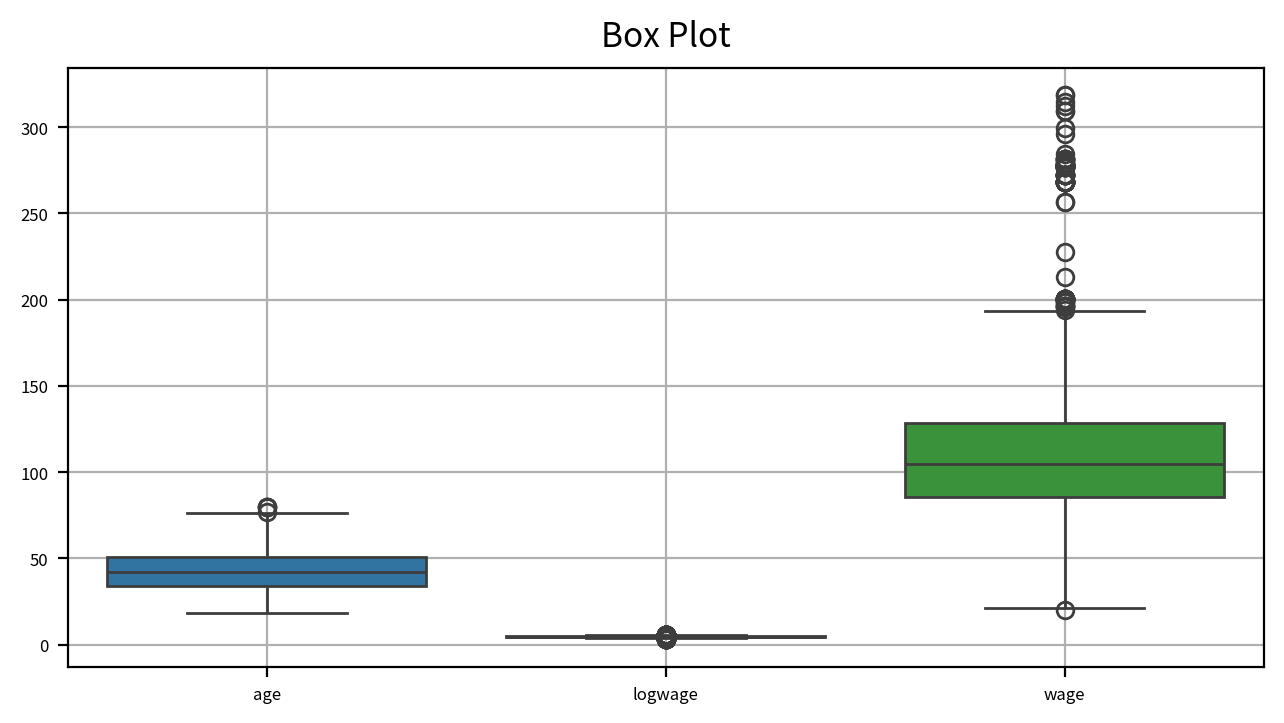

In [8]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df1)

# 3) 그래프 꾸미기: 
ax.set_title("Box Plot", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

> -> 데이터 구간 차이가 심함 -> 이런 경우엔 하나의 그래프에 모든 컬럼을 시각화 하는 것은 오히려 해석하기 어려운 결과물을 생선한다

> 해서 이 케이스에서는 각각의 개별 상자그림을 그리는 것이 나음:

### 3. 상자그림 개별 표시

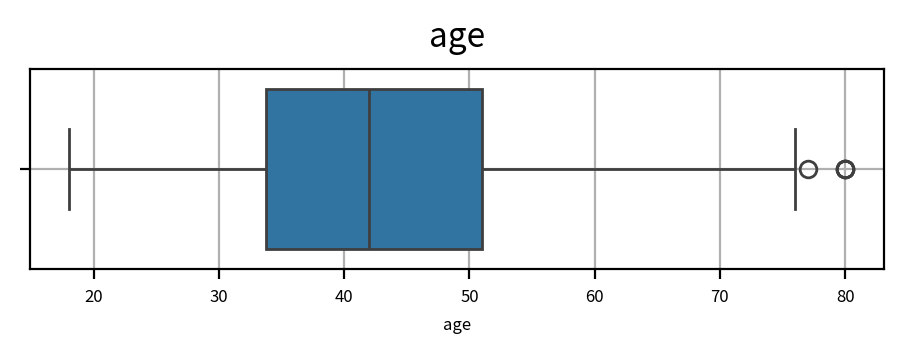

In [9]:
# 1) 그래프 초기화 
width_px = 900              # 그래프 가로 크기
height_px = 350             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df1, x = 'age')

# 3) 그래프 꾸미기: 
ax.set_title("age", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

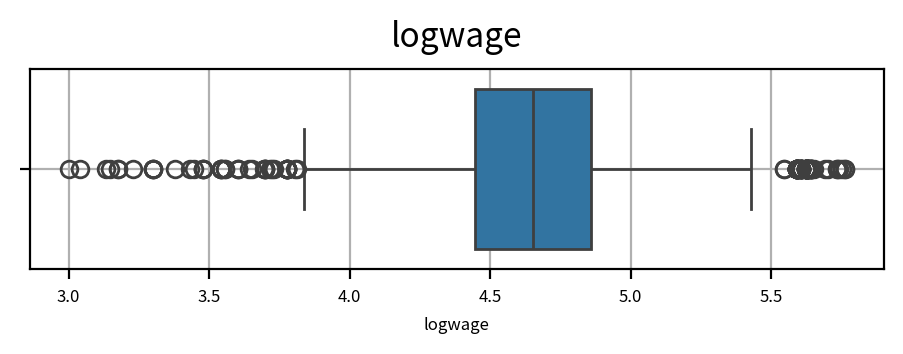

In [10]:
# 1) 그래프 초기화 
width_px = 900              # 그래프 가로 크기
height_px = 350             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df1, x = 'logwage')

# 3) 그래프 꾸미기: 
ax.set_title("logwage", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

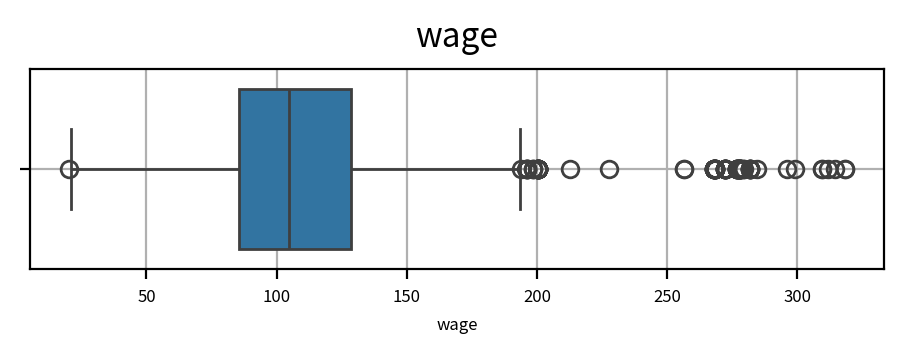

In [11]:
# 1) 그래프 초기화 
width_px = 900              # 그래프 가로 크기
height_px = 350             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df1, x = 'wage')

# 3) 그래프 꾸미기: 
ax.set_title('wage', pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

변수 100개 있어도 하나하나 다 하게..? ㅎ

-> **반복문 활용하기:**

- 동일한 설정에서 컬럼이름만 변경하면 되서 
- 컬럼 이름을 리스트로 담아두고 반복문 처리 할 수 있다 :

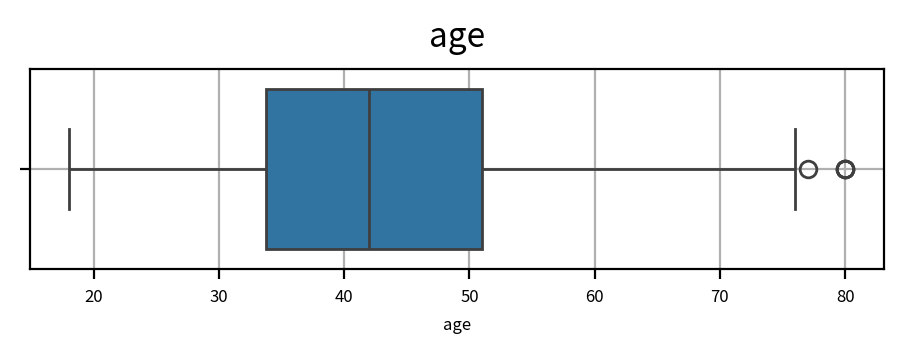

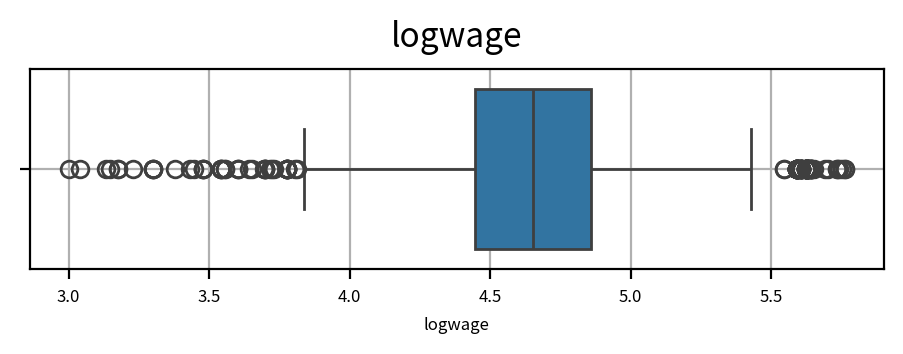

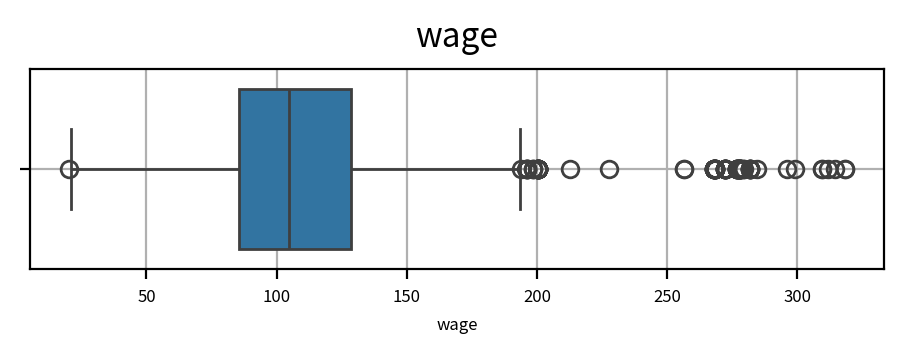

In [12]:
fields = ['age', 'logwage', 'wage']

for f in fields:
    # 1) 그래프 초기화 
    width_px = 900              # 그래프 가로 크기
    height_px = 350             # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


    # 2) boxplot 그래프 그리기: seaborn 사용
    sb.boxplot(data = df1, x = f)

    # 3) 그래프 꾸미기: 
    ax.set_title(f, pad = 8, fontsize = 12)
    ax.grid(True)                # 배경, 격자 표시/숨김

    # 4) 출력
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
    plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실 [요약]:

- 조사 인원은 3000명이다
- 조사 인원의 연령은 18세~80세 까지고, 평균 연령은 42.4세이다
- 조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그변환한 평균값은 4.65이다.
- 연령에 대한 표준 편차는 11.5이고, 임금의 표준 편차는 41.73이다.
- 임금에 대한 표준편차가 크다.

## #05. 명목형 변수의 데이터 분포 확인

명목형의 분포는 **'집단별 데이터 수 집계 (count 함수)'** 를 써서 표현된다

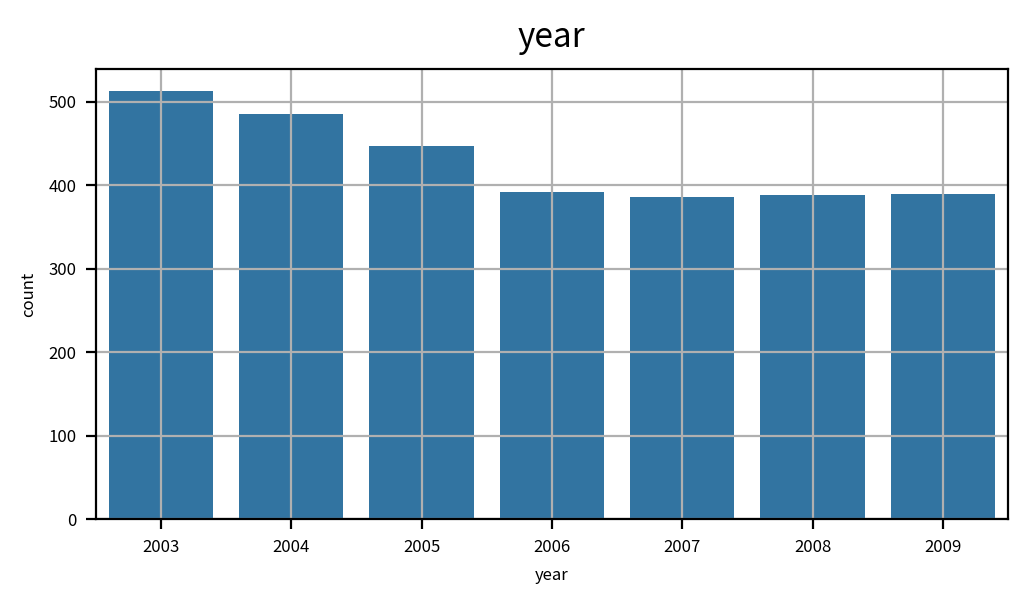

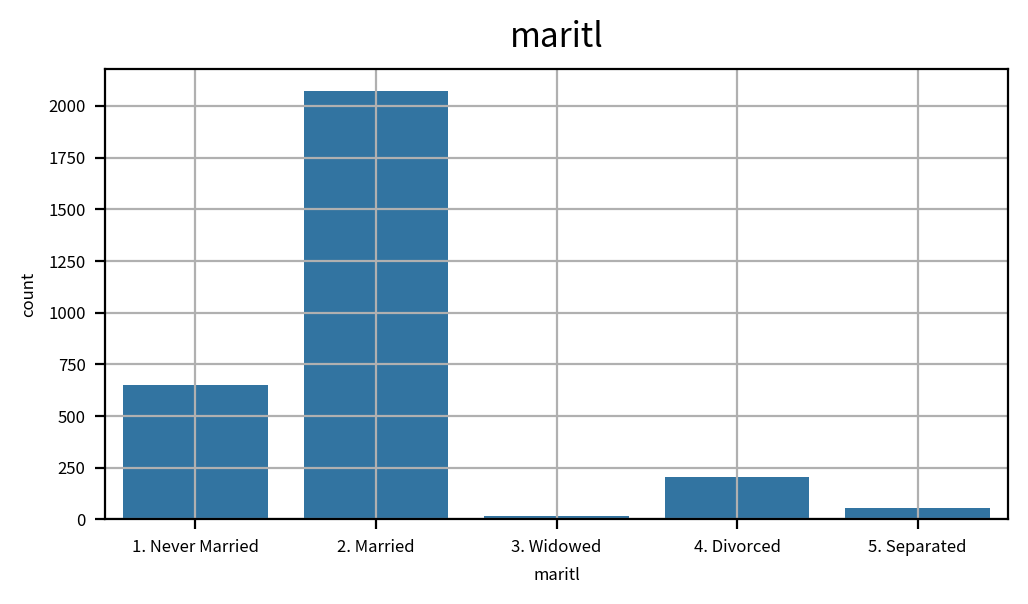

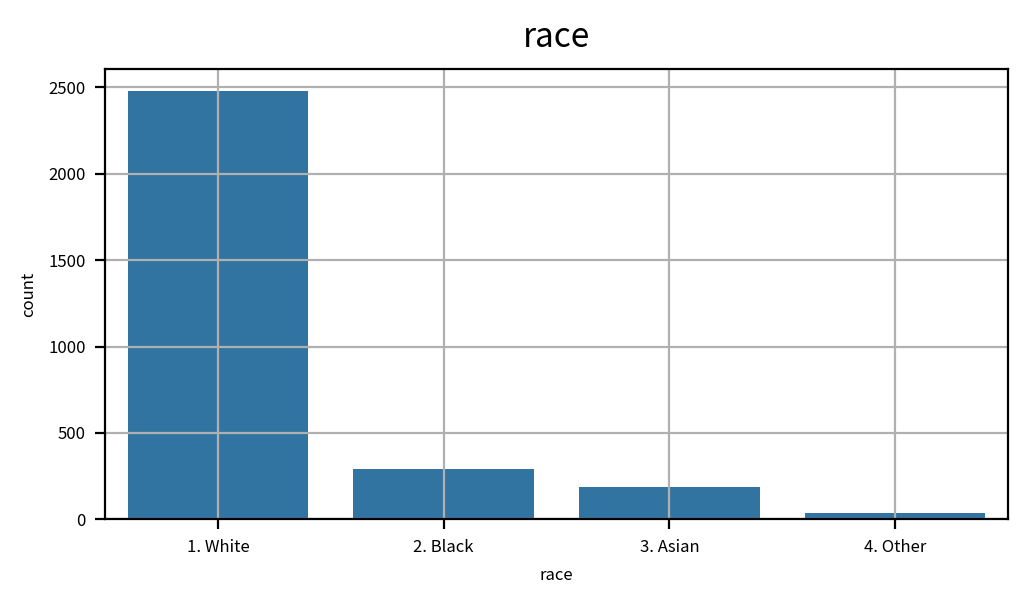

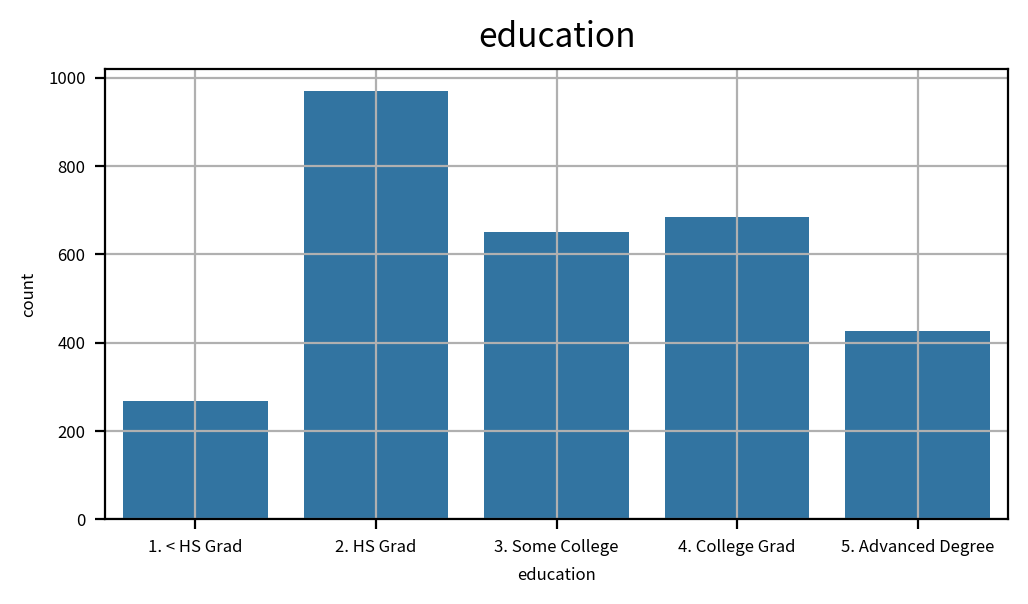

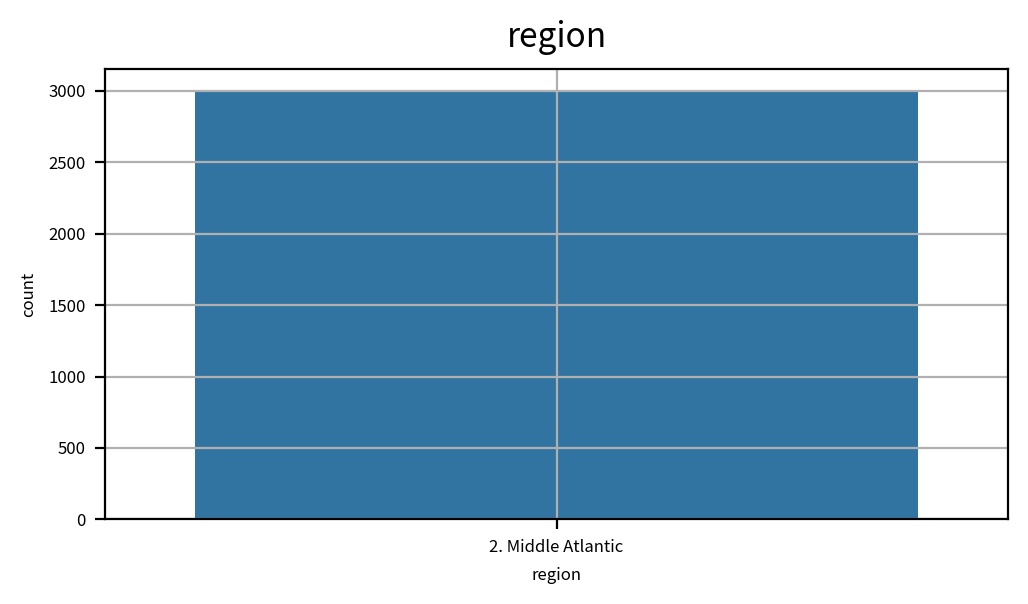

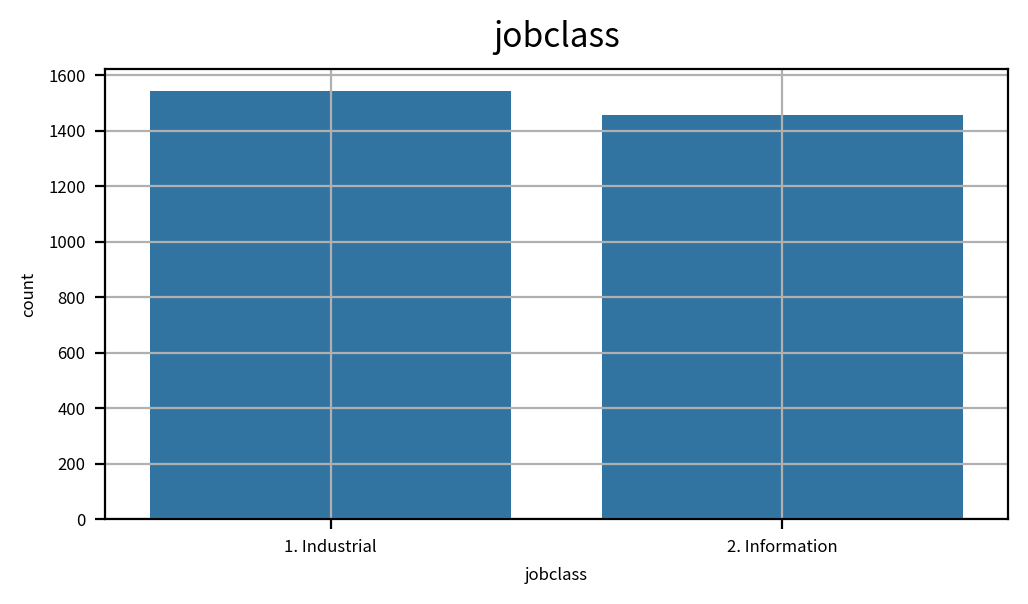

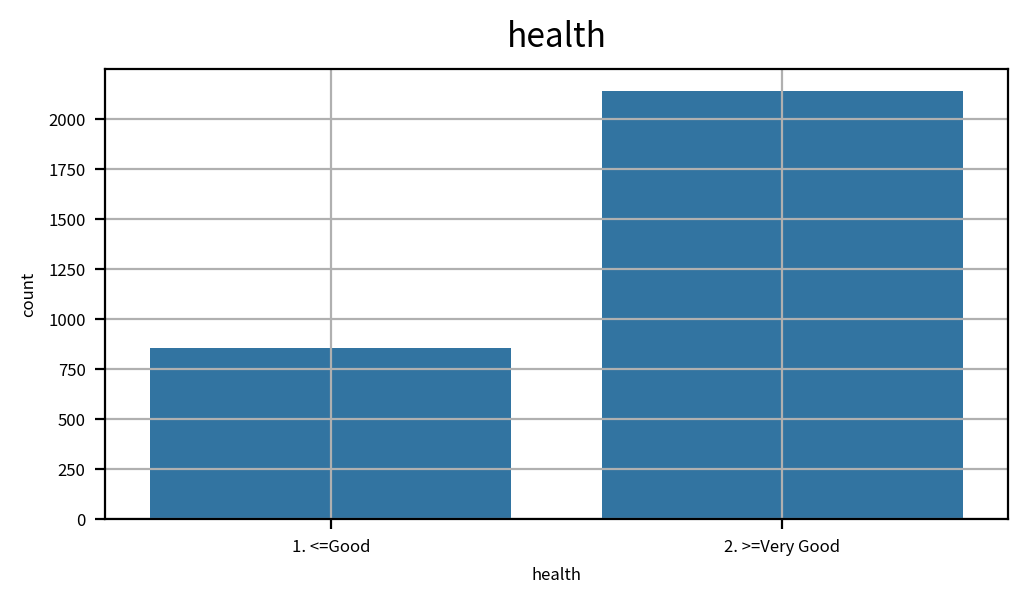

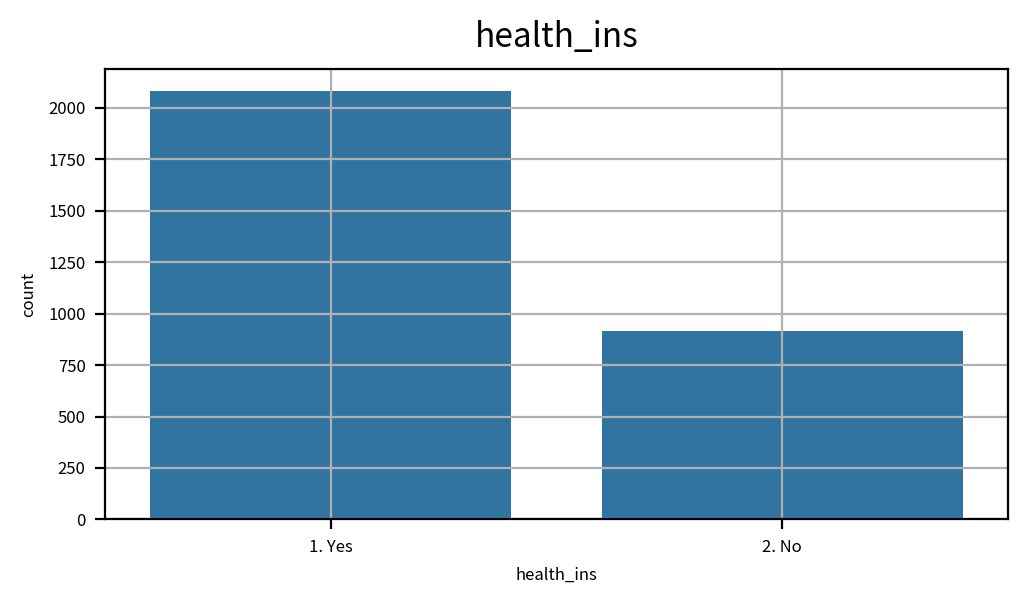

In [13]:
fields = ['year', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']

for f in fields:
    # 1) 그래프 초기화
    width_px = 1024                 # 그래프 가로 크기
    height_px = 600                 # 그래프 세로 크기
    rows = 1                        # 그래프 행 수
    cols = 1                        # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    # 2) Countplot 그리기
    sb.countplot(data = df1, x = f)

    # 3) 그래프 꾸미기
    ax.set_title(f, fontsize = 12, pad = 8)
    ax.grid(True) # 배경 격자 표시/숨김

    # 4) 출력
    plt.tight_layout() # 여백 제거
    plt.show() # 그래프 화면 출력
    plt.close() # 그래프 작업 종료


### 알 수 있는 사실:

1. 기혼자가 그렇지 않은 사람보다 많다.
2. 백인이 다른 인종보다 더 많다.
3. 고등학교 졸업(HS Grad)가 가장 많고 그 다음으로 많은 경우는 대학교 졸업(College Grad), 대학교 중퇴(Some College), 대학원 졸업(Advanced Degree) 순이다. 일부 고등학교 미만의 학력도 보인다.
4. 조사 지역은 중앙 대서양 연안으로만 한정되어 있다.
5. 직군은 생산직과 사무직이 비슷한 비율로 분포되어 있지만, 생산직이 약간 더 많은 비율을 차지한다.
6. 건강상태는 대부분의 조사 대상이 좋은 상태를 보이고 있다.
7. 건강 보험은 대부분의 조사 대상이 가입되어 있다.

## #06. 결혼 여부에 따른 임금 수준 비교

결본 여부에 따라 임금 수준을 히스토그램으로 비교하기

### 값의 종류 확인:

`.unique()` 함수 사용

In [16]:
married = sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

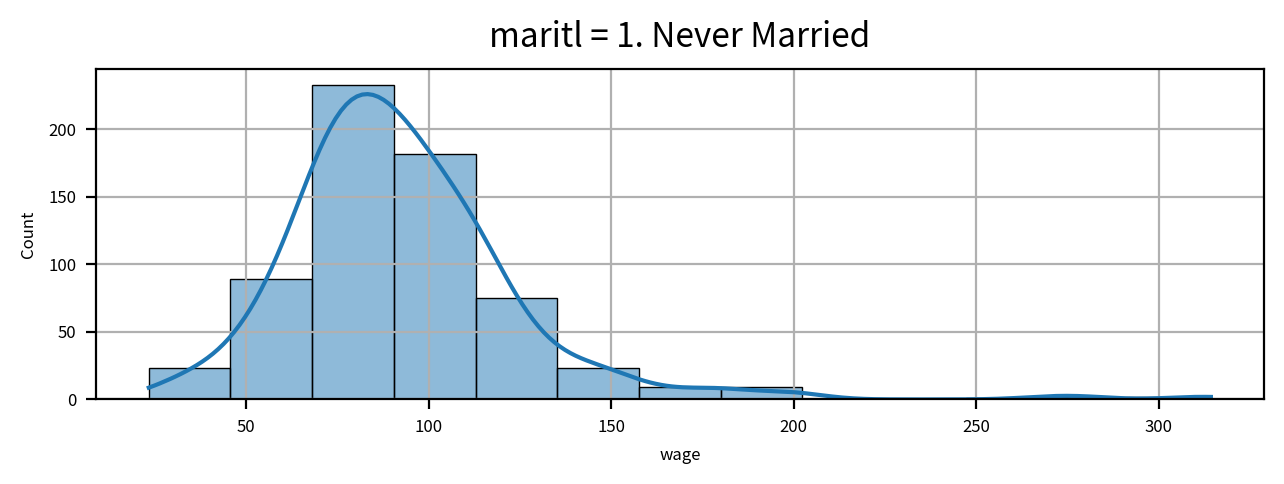

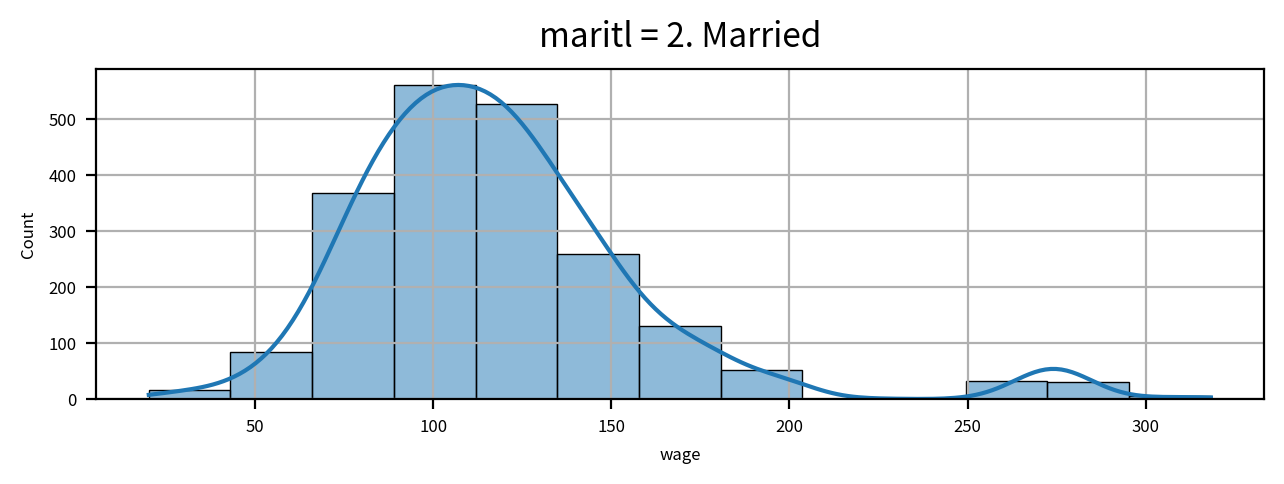

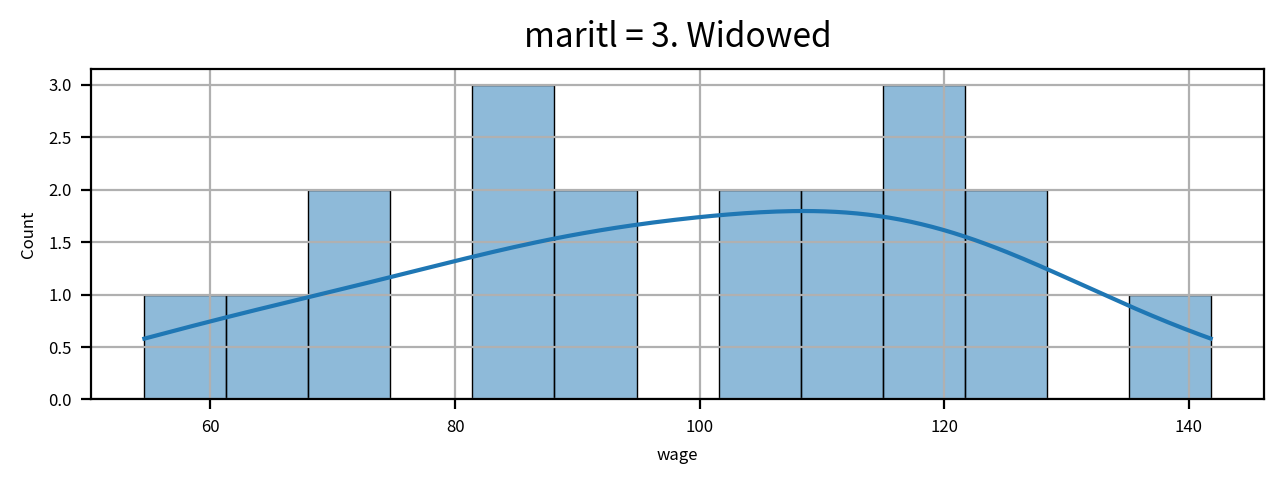

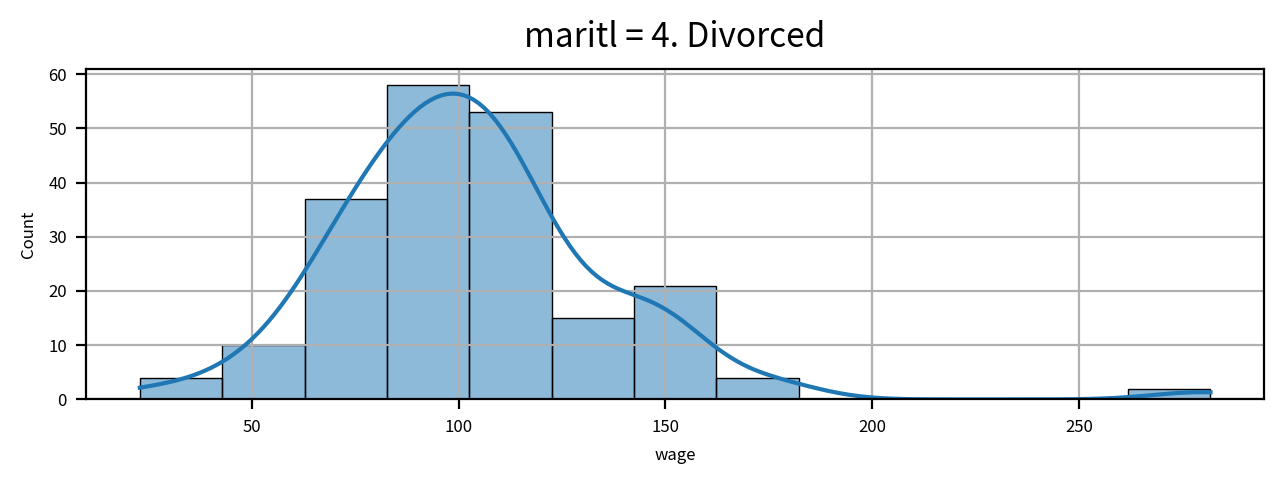

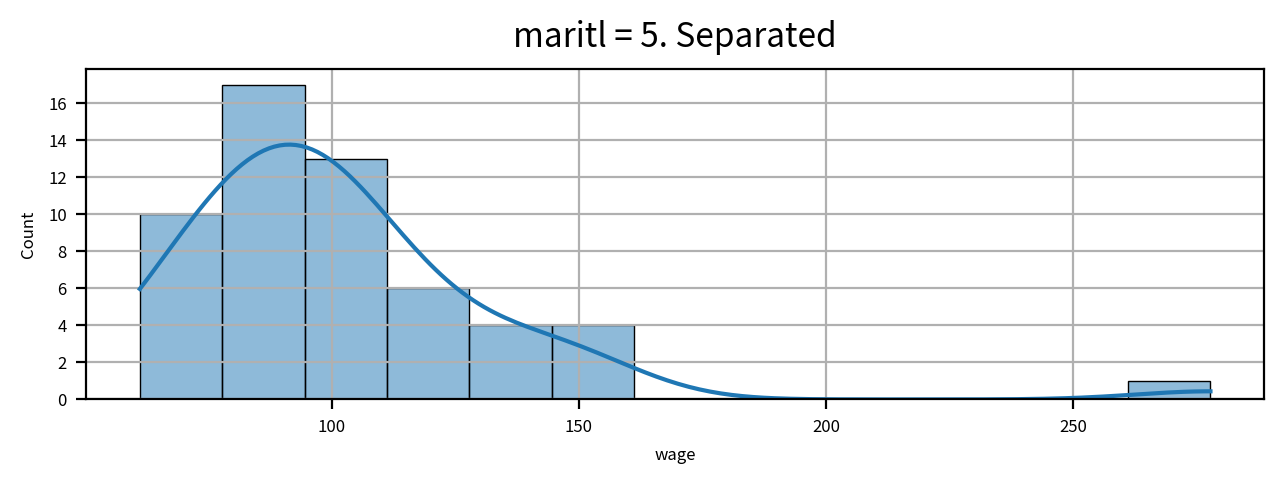

In [18]:
bins_count = 13     # 13개로 구간 쪼갠건 ADsP 출제자 맘임 ㅋ

for m in married:
    mdf = df1.query('maritl == @m')

    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    width_px = 1280             # 그래프 가로 크기
    height_px = 480             # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    
    # 2) Histogram 그리기
    sb.histplot(data = mdf, x = 'wage', bins = bins_count,
               edgecolor = "#000000", linewidth = 0.5, kde=True)
    
    # 3) 그래프 꾸미기: 
    ax.set_title("maritl = %s" % m, pad = 8, fontsize = 12)
    ax.grid(True)                # 배경, 격자 표시/숨김
    
    # 4) 출력
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
    plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실:

1. `1. Never Married / 2. Married`
    - 미혼인 경우 보다는 기혼인 경우의 소득 수준이 더 높으며, 미혼인 고액 소득자보다 기혼인 고액 소득자가 더 많다. 

2. `3. Widowed`
    - 미망인의 경우도 미혼인 경우 보다는 소득 수준이 높은 것으로 나타났다.

3. `4. Divorced / 5. Separated`
    - 이혼 또는 별겨의 경우 미혼인 경우 보다도 소득 수준이 낮은 것으로 나타났다.

## #07. 교육 수준에 따른 임금 수준 비교

> 6번 응용

In [19]:
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

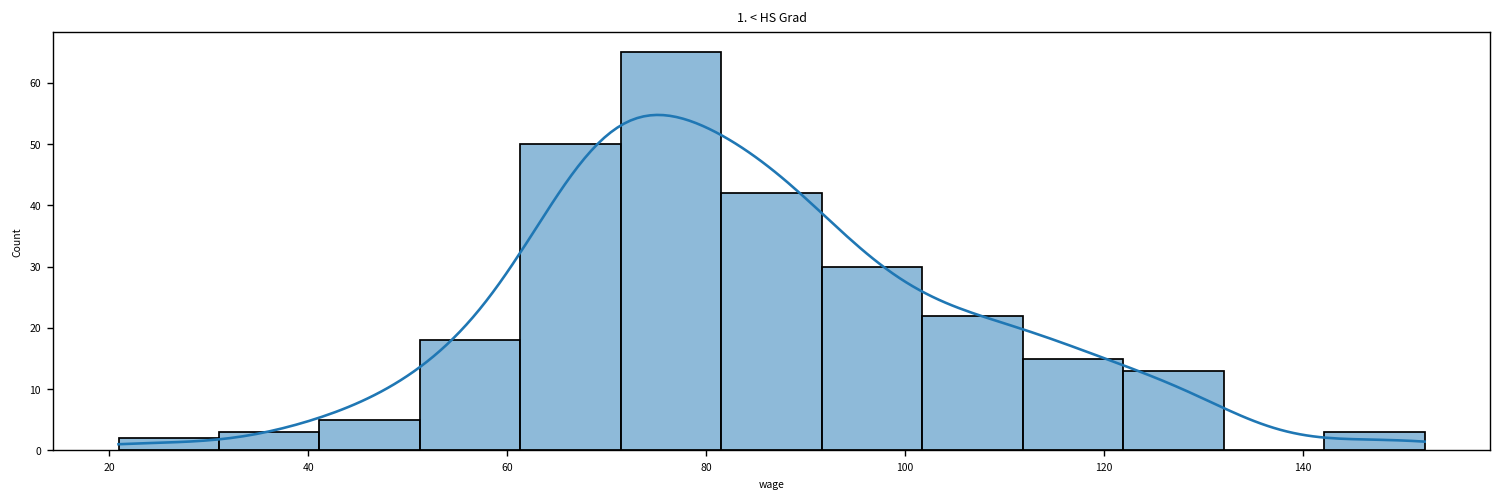

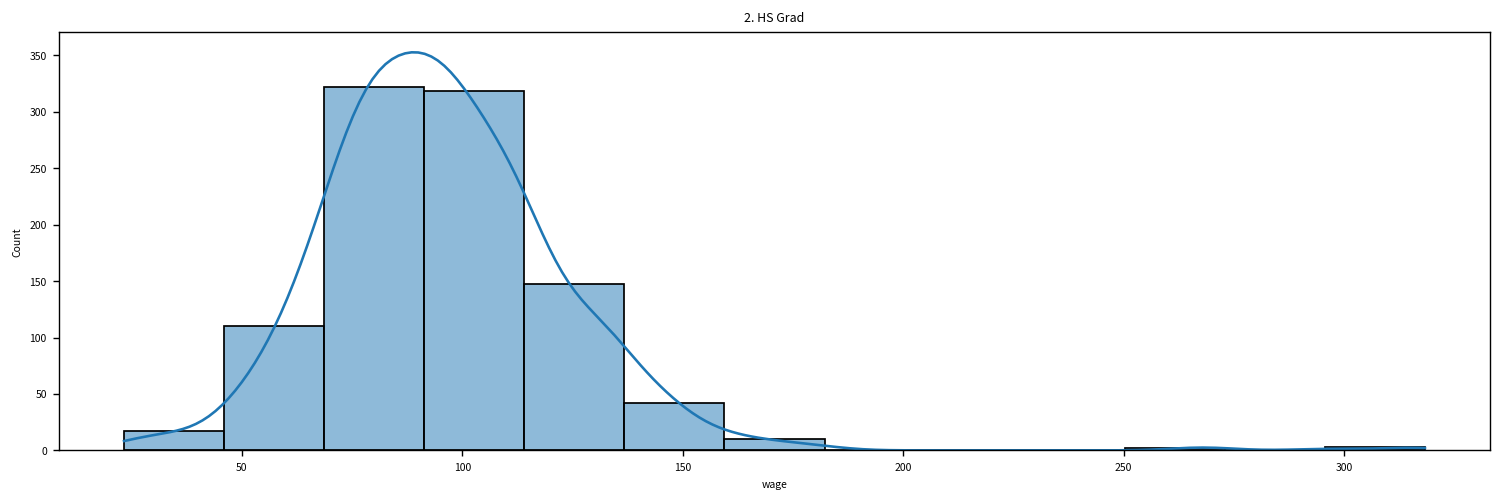

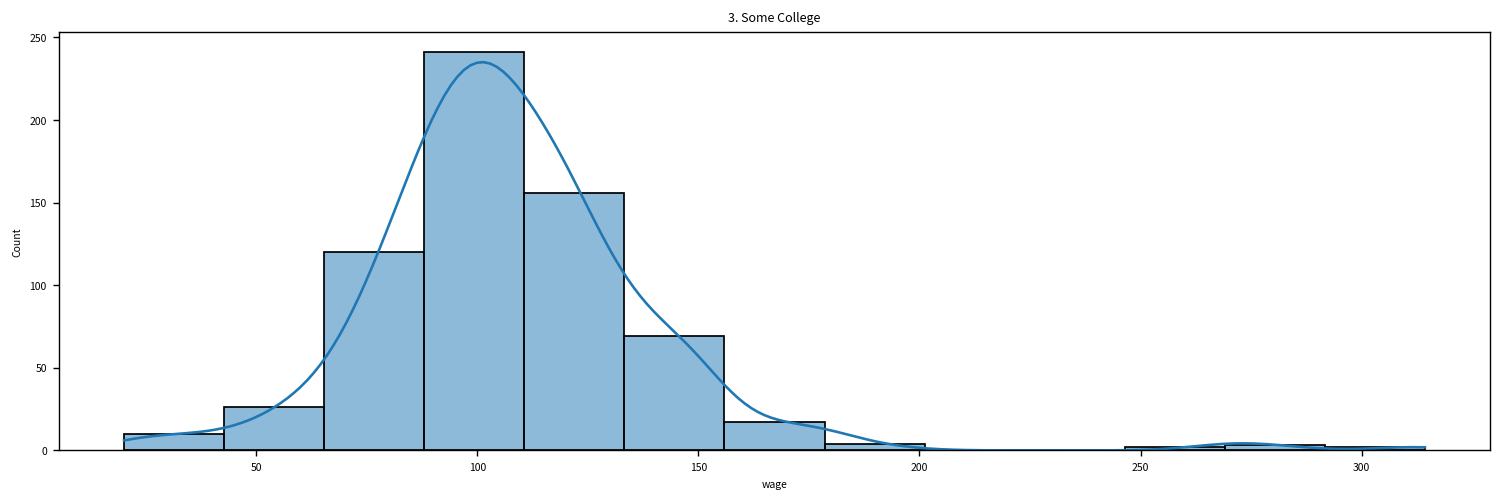

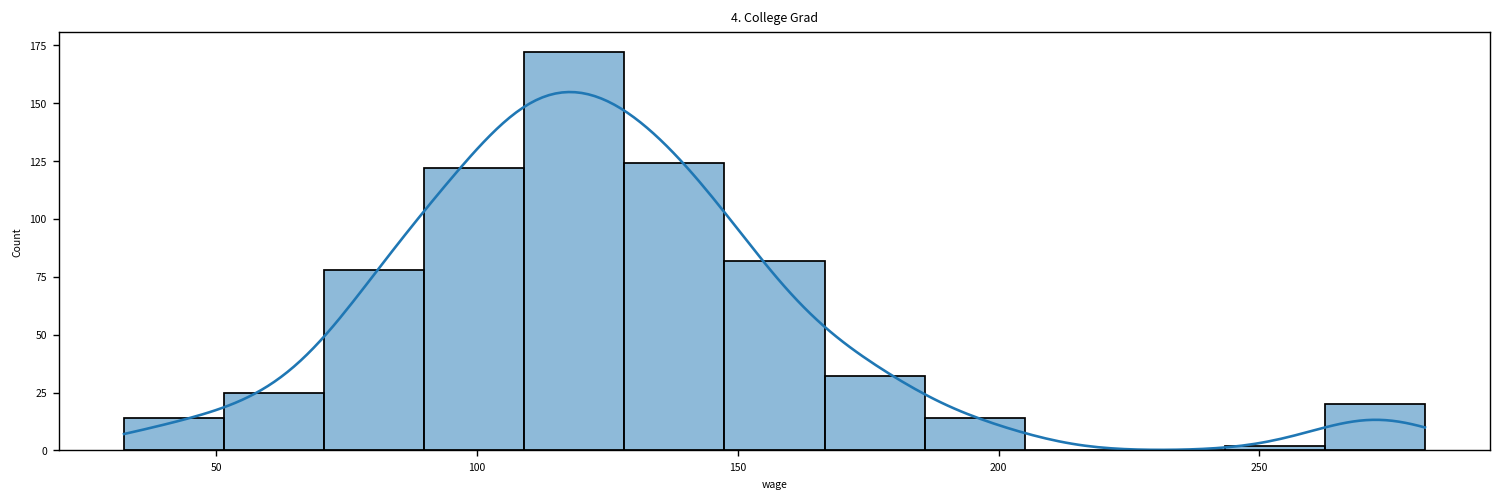

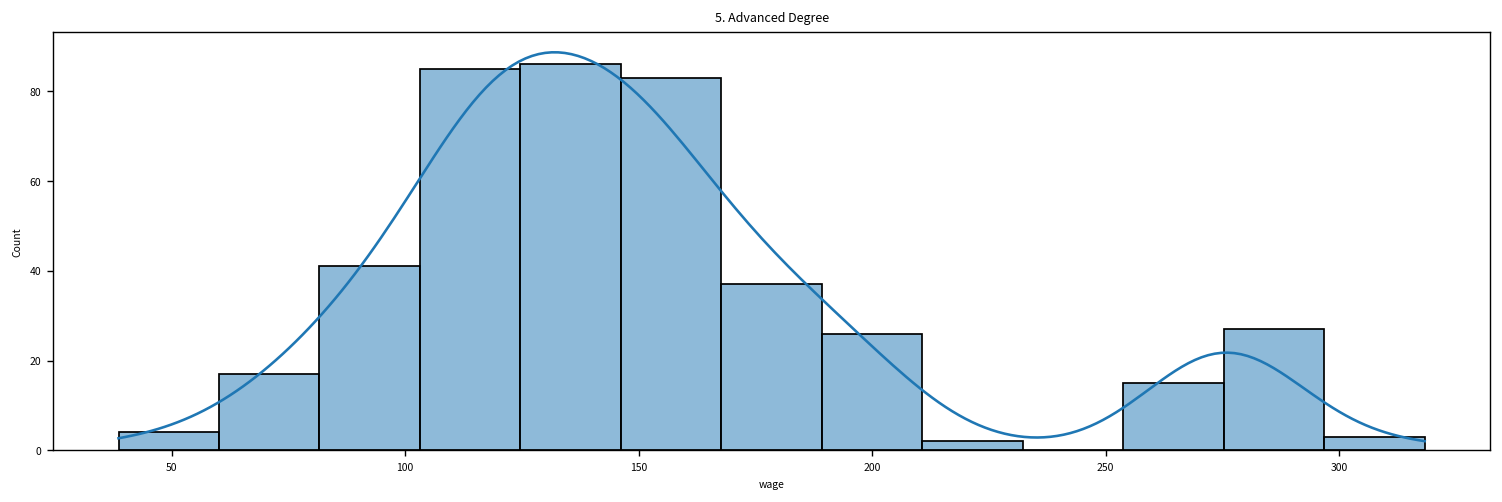

In [20]:
bins_count = 13     # 13개로 구간 쪼갠건 ADsP 출제자 맘임 ㅋ

for e in education:
    mdf = df1.query('education == @e')

    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    plt.figure(figsize = (12, 4), dpi = 125)    
    
    # 2) Histogram 그리기
    sb.histplot(data = mdf, x = 'wage', bins = bins_count, kde=True)
    
    # 3) 출력
    plt.title(e)
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
    plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실:

교육 수준은 소득 수준과 비례한다.

## #08. 직군 별 건강상태 확인

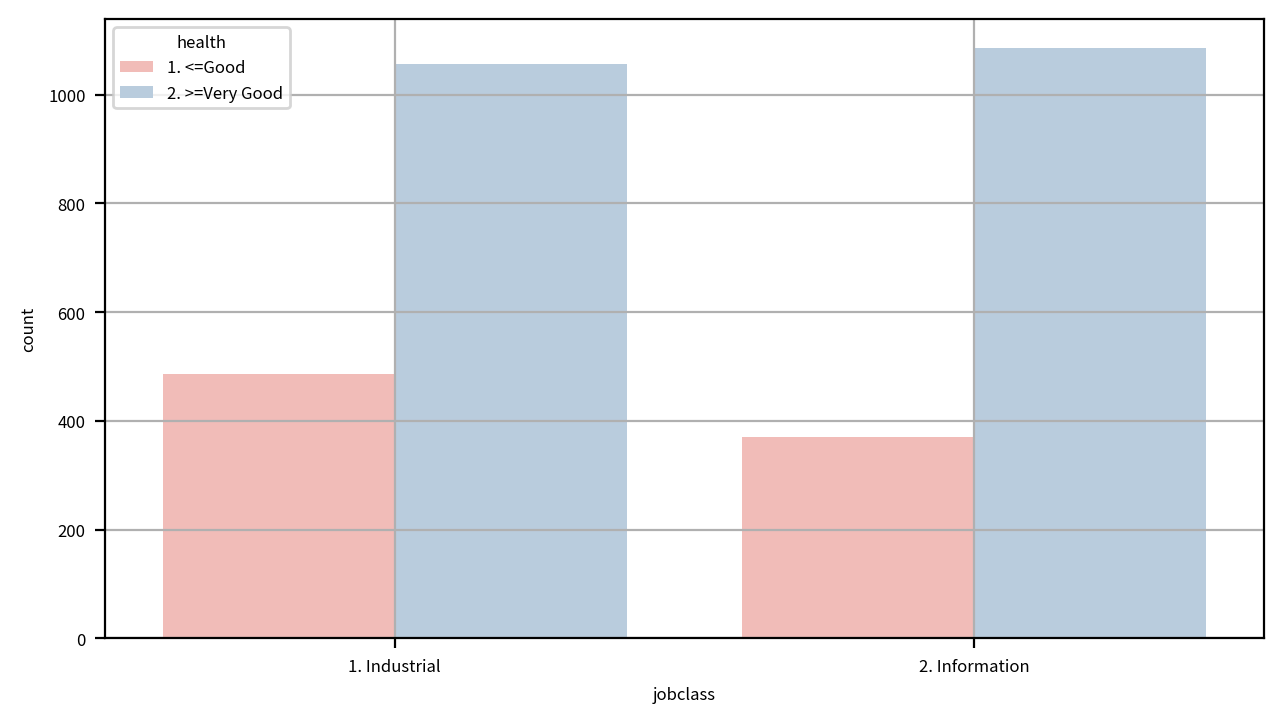

In [23]:
# 1) 그래프 초기화 
width_px = 1280              # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) countplot 그래프 그리기: seaborn 사용
sb.countplot(data = df1, x = 'jobclass', hue = 'health', palette = 'Pastel1')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실:

대부분 근로자의 건강산태는 좋은 편이나, 평균 이하의 건강상태를 보이는 근로자는 생상직군에 더 많이 분포되어 있다. 

> industrial(현장직) vs information(사무직)

> married: 최빈구간의 위치로 판단

> 더 정확한 분석을 원한다면 사분위수, 표준편차 등의 기술통계 데이터를 봐야됨

> 그리고 기술통계 그래프의 양쪽 끝 값도 놓치지 말기!